# Support Vector Machine (SVM) and Kernel Functions

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import SVM model
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

#### Frist, We will create a non-linearly seperable dataset.

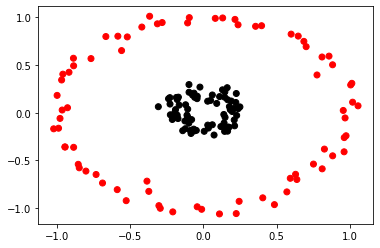

In [47]:
from sklearn.datasets import make_circles
X, y = make_circles(150, factor=.2, noise=.05)

# X contains the X and Y co-ordinates of the data points
# y contains the labels for each data points

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='flag')
plt.show()

## <span style="color:crimson">Classify using the Linear Kernel</span>

In [100]:
# function to train the model and plotting the decision boundary 

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_decision_boundary(X,y,classifier):
    # title for the plot
    title = (F"Decision boundary by {classifier.kernel} kernel")
    # Set-up grid for plotting.
    fig, ax = plt.subplots()
    xx, yy = make_meshgrid(X[:, 0], X[:, 1])
    plot_contours(ax, classifier, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()


In [104]:
# train the model
model = svm.SVC(kernel='linear')
linear_clf = model.fit(X, y)

<IPython.core.display.Javascript object>

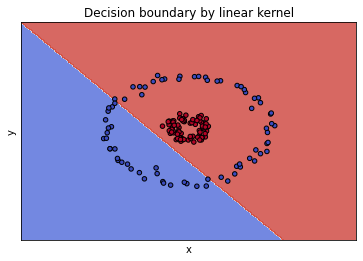

In [105]:
# using linear kernel
plot_decision_boundary(X,y,linear_clf)

In [106]:
# split the data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)

In [107]:
# train and predict using a linear classifier
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(xtrain, ytrain)
ypred=linear_clf.predict(xtest)


<IPython.core.display.Javascript object>

In [108]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)

0.6333333333333333

**We get an Accuracy of 63%**

Obviously a linear classifier will not fit a non-linear data. So it's not classifying the data points correctly as expected. The red datapoints are identified along with black since the data is non-linear.

## <span style="color:crimson">Classify using the Radial Basis Function (RBF) Kernel</span>

In [110]:
# train the model
model = svm.SVC(kernel='rbf')
rbf_clf = model.fit(X, y)

<IPython.core.display.Javascript object>

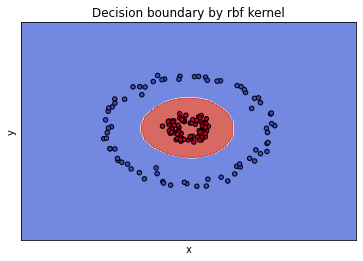

In [111]:
# using rbf kernel
plot_decision_boundary(X,y,rbf_clf)

Here the decision boundary is perfectly seperating both the classes.

In [112]:
# train and predict using a RBF Kernel classifier
rbf_clf = svm.SVC(kernel='rbf')
rbf_clf.fit(xtrain, ytrain)
ypred=rbf_clf.predict(xtest)


<IPython.core.display.Javascript object>

In [113]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)

1.0

**We get an Accuracy of 100%**

## What is Happening Internally?

To tarnsform the two dimensional data to three dimensional, we need the z co-ordinates. To do this, we will use the Radial Basis Function e<sup>-x</sup><sup><sup>2</sup></sup> to create the z co-ordinates. 

Use https://www.desmos.com/calculator and type y = e<sup>-x</sup><sup><sup>2</sup></sup> to visualize the shifting of data points. When they are not in the center the equation modifies to adjust the data. for e.g. y = e<sup>-(x+5)</sup><sup><sup>2</sup></sup>

In [160]:
# create z co-ordinates. This is only for understanding of what happens inside the rbf kernel. 
#We don't have to create this and pass it to the model. The rbf kernel trick does this automatically.
z = np.exp(-(X ** 2)).sum(1)

In [165]:
# first both the x and y from X are calculated to exp(-(X ** 2))
X[0], np.exp(-(X[0] ** 2))

(array([0.21600301, 0.97604967]), array([0.95441442, 0.38570866]))

In [170]:
# then they are added along Y axis. So X[0, 0] + X[0, 1] to get z co-ordinate. z for first data point will be
# 0.95441442 + 0.38570866 = 1.34
z.shape, z[0]

((150,), 1.3401230790136154)

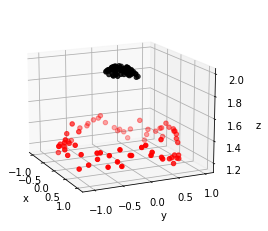

In [210]:
# plot in 3d

axes = plt.subplot(projection='3d')
axes.scatter3D(X[:, 0], X[:, 1], z, c=y, cmap='flag')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_zlabel('z')

# rotate the axes and update
axes.view_init(15, -25)
    
plt.show()

## <span style="color:crimson">Classify using the Poly Kernel</span>

In [114]:
# train and predict using a poly kernel with degree 3
poly_clf = svm.SVC(kernel='poly', degree=3)
poly_clf.fit(xtrain, ytrain)
ypred=poly_clf.predict(xtest)

<IPython.core.display.Javascript object>

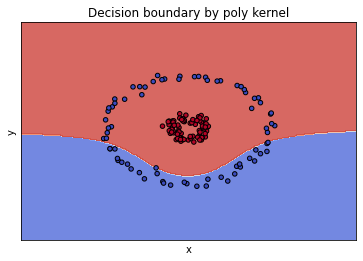

In [115]:
# using poly kernel
plot_decision_boundary(X,y,poly_clf)

In [116]:
# train and predict using a poly kernel with degree 2
poly_clf = svm.SVC(kernel='poly', degree=2)
poly_clf.fit(xtrain, ytrain)
ypred=poly_clf.predict(xtest)

<IPython.core.display.Javascript object>

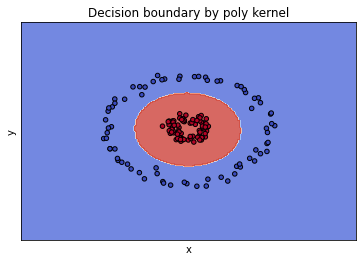

In [117]:
# using poly kernel
plot_decision_boundary(X,y,poly_clf)

Using Grid-Search CV you can test different values for degree of the polynomial and find the optimal degree.

In [119]:
# train and predict using a poly Kernel degree 2 classifier
poly_clf = svm.SVC(kernel='poly', degree=2)
poly_clf.fit(xtrain, ytrain)
ypred=poly_clf.predict(xtest)


<IPython.core.display.Javascript object>

In [120]:
# check model performance
from sklearn.metrics import accuracy_score
accuracy_score(ypred, ytest)

1.0

**We get an Accuracy of 100%**